In [1]:
import glob
import pickle
import random

from math import radians

from keyrover import *
from keyrover.vision import device
from keyrover.math.bilinear import InverseBilinear

In [2]:
files = glob.glob(f"{DATASETS}/keyboard/v4-nodistort/*.jpg")
with open("datasets/camera/camera_data.bin", "rb") as f:
    camera_data = pickle.load(f)

In [3]:
transform = InverseBilinear(1, width=640, height=480, device=device,
                            p1=KeyboardBottomLeft, p2=KeyboardBottomRight, p3=KeyboardTopRight, p4=KeyboardTopLeft)

tensor([[-51.7972,  24.5555],
        [384.6575, 354.9505]], device='mps:0')


<Axes: >

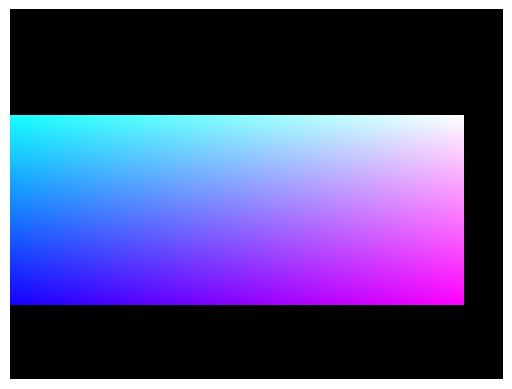

In [11]:
transform = InverseBilinear(2, width=640, height=480, device=device,
                            p1=KeyboardBottomLeft, p2=KeyboardBottomRight, p3=KeyboardTopRight, p4=KeyboardTopLeft)

mask = transform(alpha=[0, 0], beta=[0, 0], gamma=[0, 0], position=[[0, 0, 4], [0, 0, 5]])
imshow(mask[0])

tensor([[ 16.1594],
        [322.9572]], device='mps:0')
<class 'torch.Tensor'> (torch.float32, shape=torch.Size([1, 3, 240, 320]))
        Min: 0.0
        Max: 1.0
        Mean: 0.3217618465423584


<Axes: >

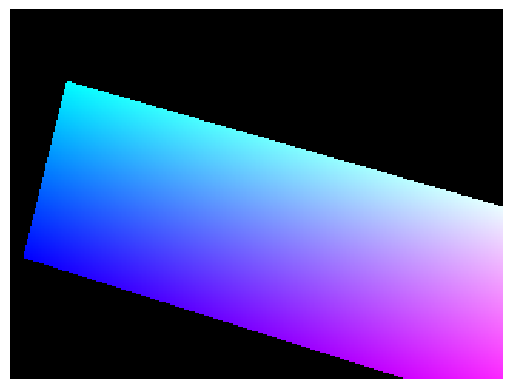

In [4]:
mask = transform(alpha=radians(3), beta=radians(5), gamma=radians(15), position=[0, 0, 4])

describe(mask)
imshow(mask[0])

/Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/keyrover/../datasets/keyboard/v4-nodistort/keyboard_2320_1.jpg


(<Axes: >, <Axes: >)

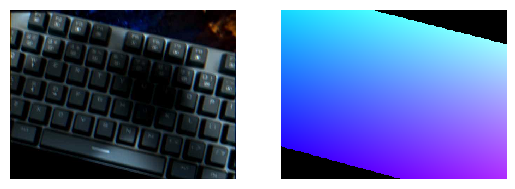

In [5]:
path = random.choice(files)
img = cv2.imread(path)
print(path)

i = int(path.split("_")[1]) - 1

mask = transform(*camera_data["rotation"][i], camera_data["location"][i])
imshow(img, mask[0])